# TASK 2 - PREDICTION USING UNSUPERVISED ML 

## Author - Rutuja Dindore 

### GRIP @ The Sparks Foundation 

#gripdecember22

Problem Statement= From the given 'Iris' dataset, predict the optimum number of clusters and represent it visually 


In this K-means clustering task I tried to predict the optimum number of clusters and represent it visually from the given ‘Iris’ dataset.


### Importing required libraries  

In [223]:
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()
from sklearn.cluster import KMeans
import warnings
warnings.filterwarnings('ignore')

In [224]:
#importing the dataset 
df=pd.read_csv('Iris.csv',index_col=0)

In [225]:
#undestanding the data
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
Id,,,,,
1,5.1,3.5,1.4,0.2,Iris-setosa
2,4.9,3.0,1.4,0.2,Iris-setosa
3,4.7,3.2,1.3,0.2,Iris-setosa
4,4.6,3.1,1.5,0.2,Iris-setosa
5,5.0,3.6,1.4,0.2,Iris-setosa


In [226]:
df.shape

(150, 5)

In [227]:
df.isnull().sum().any()

False

In [228]:
#Creating the input variable for Model building
x=df[['SepalLengthCm','Se  palWidthCm','PetalLengthCm','PetalWidthCm']].values

### How do you find the optimum number of clusters for K Means? How does one determine the value of K?

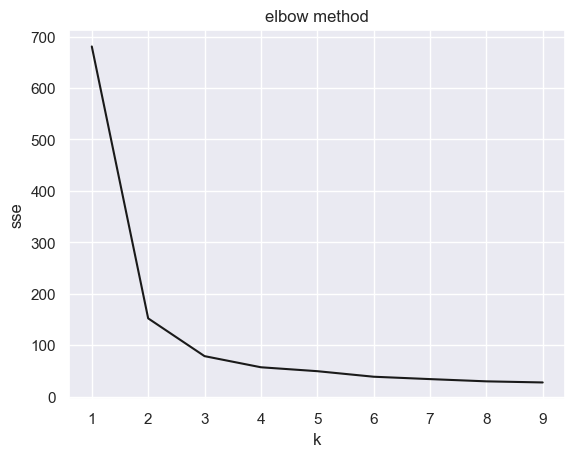

In [238]:
#trying to plot elbow and figure out the best K values for our dataset 
sse=[]
k_rng=range(1,10)
for k in k_rng:
    km1=KMeans(n_clusters=k)
    km1.fit(x)
    sse.append(km1.inertia_)

#plotting
sns.lineplot(k_rng,sse,color='k')
plt.xlabel('k')
plt.ylabel('sse')
plt.title('elbow method')
sns.set_style('whitegrid')
plt.show()
    


Increasing K values reduce the error rate and generally the optimum k value is when the elbow occurs 

In [230]:
#Assigning the k value as 3 and creating k means classifier
k=KMeans(n_clusters=3)

In [231]:
#training the data 
k.fit(x)

KMeans(n_clusters=3)

In [232]:
#predicted the data that is Species biffurcation on the basis of cluster 
k.labels_

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1])

In [233]:
#creating the new column in the original dataset
df['Cluster_label']=k.labels_

In [234]:
df

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,Cluster_label
Id,,,,,,
1,5.1,3.5,1.4,0.2,Iris-setosa,2
2,4.9,3.0,1.4,0.2,Iris-setosa,2
3,4.7,3.2,1.3,0.2,Iris-setosa,2
4,4.6,3.1,1.5,0.2,Iris-setosa,2
5,5.0,3.6,1.4,0.2,Iris-setosa,2
...,...,...,...,...,...,...
146,6.7,3.0,5.2,2.3,Iris-virginica,0
147,6.3,2.5,5.0,1.9,Iris-virginica,1
148,6.5,3.0,5.2,2.0,Iris-virginica,0


In [235]:
#Creating the variables on the basis of Cluster_labels
df1=df[df['Cluster_label']==0]
df2=df[df['Cluster_label']==1]
df3=df[df['Cluster_label']==2]

#calculate the centroids 
k.cluster_centers_

array([[6.85      , 3.07368421, 5.74210526, 2.07105263],
       [5.9016129 , 2.7483871 , 4.39354839, 1.43387097],
       [5.006     , 3.418     , 1.464     , 0.244     ]])

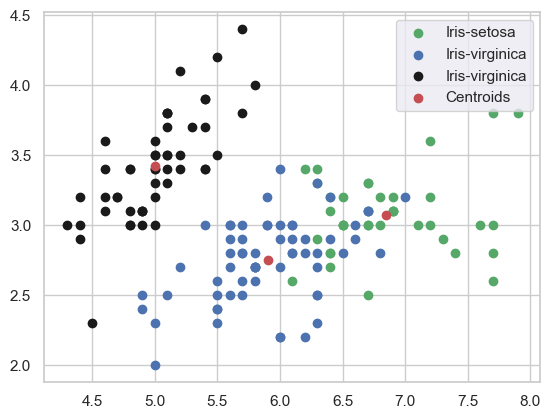

In [236]:
#plotting the predicted data on the basis of two columns 
plt.scatter(df1.SepalLengthCm,df1.SepalWidthCm,color='g',label='Iris-setosa',alpha=1)
plt.scatter(df2.SepalLengthCm,df2.SepalWidthCm,color='b',label='Iris-virginica')
plt.scatter(df3.SepalLengthCm,df3.SepalWidthCm,color='k',label='Iris-virginica')
#Centroid plotting for respective columns
plt.scatter(k.cluster_centers_[:,0],k.cluster_centers_[:,1],color='r',label='Centroids')
sns.set_style('darkgrid')
plt.legend()
plt.show()


